# Analysis and Insights

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
with open('loans_data.json', 'r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data['loans'])

print("Sample of the loan dataset:")
df.head(2) 

Sample of the loan dataset:


,borrower_id,loan_id,loan_amount,start_date,maturity_date,loan_type,status,investors_count,profit_percentage,repayment_amount_with_interest,risk_rating
0,13,L1,45208,2021-04-02,2021-11-13,Business,Active,17,8,48824,Medium
1,45,L2,36080,2021-04-19,2022-09-03,Business,Active,4,5,37884,Medium


In [3]:
print("Dataset Info:")
df.info()  # Display information about the DataFrame

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54077 entries, 0 to 54076
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borrower_id                     54077 non-null  int64 
 1   loan_id                         54077 non-null  object
 2   loan_amount                     54077 non-null  int64 
 3   start_date                      54077 non-null  object
 4   maturity_date                   54077 non-null  object
 5   loan_type                       54077 non-null  object
 6   status                          54077 non-null  object
 7   investors_count                 54077 non-null  int64 
 8   profit_percentage               54077 non-null  int64 
 9   repayment_amount_with_interest  54077 non-null  int64 
 10  risk_rating                     54077 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.5+ MB


# Cleaning the data

In [4]:
print("Missing Values:")
df.isnull().sum()  # Display count of missing values for each column

Missing Values:


borrower_id                       0
loan_id                           0
loan_amount                       0
start_date                        0
maturity_date                     0
loan_type                         0
status                            0
investors_count                   0
profit_percentage                 0
repayment_amount_with_interest    0
risk_rating                       0
dtype: int64

In [29]:
# Drop null values (If there's any)
df = df.dropna()

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['maturity_date'] = pd.to_datetime(df['maturity_date'])

In [6]:
df.drop_duplicates(subset='loan_id', keep='first', inplace=True)

In [7]:
df = df[df['start_date'] < df['maturity_date']]

C:\Users\Adel\AppData\Local\Temp\ipykernel_12280\317977099.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


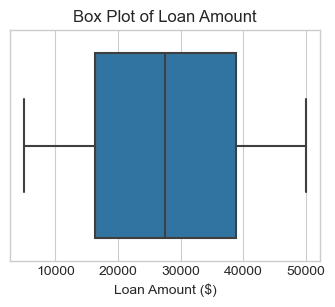

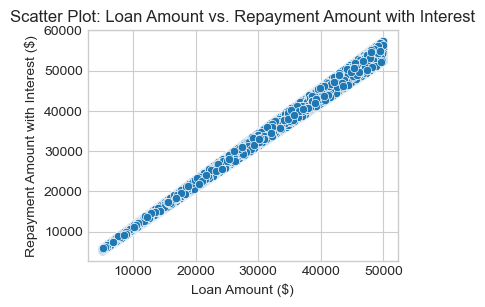

In [8]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['loan_amount'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.show()

plt.figure(figsize=(4, 3))
sns.scatterplot(x=df['loan_amount'], y=df['repayment_amount_with_interest'])
plt.title('Scatter Plot: Loan Amount vs. Repayment Amount with Interest')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Repayment Amount with Interest ($)')
plt.show()

In the box plot, outliers appear as individual points beyond the whiskers of the box.

In the scatter plot, outliers appear as data points that deviate significantly from the general trend or cluster of points.

#### No outliers exists

In [9]:
print("\nCleaned Dataset:")
df.head(2)  # Display the cleaned DataFrame (sample)


Cleaned Dataset:


,borrower_id,loan_id,loan_amount,start_date,maturity_date,loan_type,status,investors_count,profit_percentage,repayment_amount_with_interest,risk_rating
0,13,L1,45208,2021-04-02,2021-11-13,Business,Active,17,8,48824,Medium
1,45,L2,36080,2021-04-19,2022-09-03,Business,Active,4,5,37884,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54077 entries, 0 to 54076
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borrower_id                     54077 non-null  int64         
 1   loan_id                         54077 non-null  object        
 2   loan_amount                     54077 non-null  int64         
 3   start_date                      54077 non-null  datetime64[ns]
 4   maturity_date                   54077 non-null  datetime64[ns]
 5   loan_type                       54077 non-null  object        
 6   status                          54077 non-null  object        
 7   investors_count                 54077 non-null  int64         
 8   profit_percentage               54077 non-null  int64         
 9   repayment_amount_with_interest  54077 non-null  int64         
 10  risk_rating                     54077 non-null  object        
dtypes:

*************************

**************************

*****************************

### 1. Understanding the total active loans and completed loans.

In [11]:
loan_status_counts = df['status'].value_counts()

active_loans_count = loan_status_counts.get('Active', 0)
completed_loans_count = loan_status_counts.get('Completed', 0)

print(f"Total Active Loans: {active_loans_count}")
print(f"Total Completed Loans: {completed_loans_count}")

Total Active Loans: 27040
Total Completed Loans: 27037


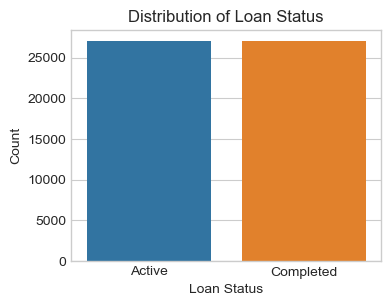

In [12]:
plt.figure(figsize=(4, 3))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

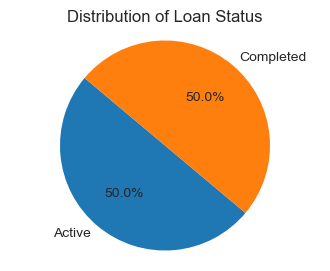

In [14]:
plt.figure(figsize=(4, 3))  # Adjust figure size if needed

plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Loan Status')
plt.show()

### 2. Identify how many new loans created and closed loans every month wise for current year.

1. Converts the 'start_date' column to datetime objects and extracts the year and month into new columns 'year' and 'month' using pandas' `dt.year` and `dt.month` methods.
2. Filters the DataFrame to include only records from the current year using `pd.Timestamp.now().year`.
3. Groups the filtered data by month and counts the occurrences of loan statuses ('Active' and 'Completed') using `groupby`, `value_counts`, and `unstack` operations.
4. Prints the count of new (Active) and closed (Completed) loans for each month of the current year, displaying the results in a month-wise format using a for loop and `strftime` to retrieve month names.

In [16]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month

current_year = pd.Timestamp.now().year
df_current_year = df[df['year'] == pd.Timestamp.now().year]

monthly_loan_counts = df_current_year.groupby('month')['status'].value_counts().unstack(fill_value=0)

In [17]:
new_loans_by_month = monthly_loan_counts['Active']
closed_loans_by_month = monthly_loan_counts['Completed']

print("Month-wise New Loans (Active) and Closed Loans (Completed) for the Current Year:")
for month in range(1, 13):  # Iterate over each month (1 to 12)
    new_loans_count = new_loans_by_month.get(month, 0)
    closed_loans_count = closed_loans_by_month.get(month, 0)
    month_name = pd.Timestamp(year=current_year, month=month, day=1).strftime('%B')  # Get month name
    print(f"{month_name}: New Loans = {new_loans_count}, Closed Loans = {closed_loans_count}")

Month-wise New Loans (Active) and Closed Loans (Completed) for the Current Year:
January: New Loans = 598, Closed Loans = 602
February: New Loans = 974, Closed Loans = 896
March: New Loans = 642, Closed Loans = 666
April: New Loans = 903, Closed Loans = 943
May: New Loans = 0, Closed Loans = 0
June: New Loans = 0, Closed Loans = 0
July: New Loans = 0, Closed Loans = 0
August: New Loans = 0, Closed Loans = 0
September: New Loans = 0, Closed Loans = 0
October: New Loans = 0, Closed Loans = 0
November: New Loans = 0, Closed Loans = 0
December: New Loans = 0, Closed Loans = 0


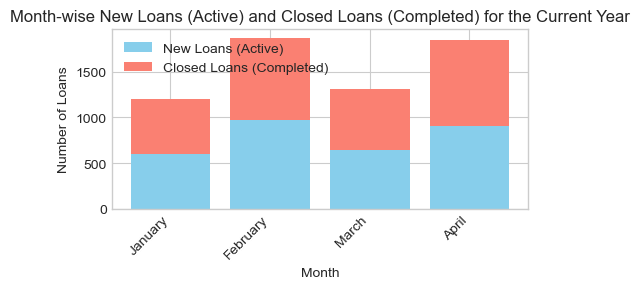

In [18]:
months = ['January', 'February', 'March', 'April']

plt.figure(figsize=(5, 3))
plt.bar(months, monthly_loan_counts['Active'], label='New Loans (Active)', color='skyblue')
plt.bar(months, monthly_loan_counts['Completed'], bottom=monthly_loan_counts['Active'], 
        label='Closed Loans (Completed)', color='salmon')

plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.title('Month-wise New Loans (Active) and Closed Loans (Completed) for the Current Year')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Identify how much amount totally financed for the loans every month wise for current year.

Calculates the total loan amount financed month-wise for the current year using a Pandas DataFrame `df_current_year` containing loan data. It first groups the loan data by month and sums up the loan amounts. 

Then, it iterates through each month (from January to December), retrieves the total loan amount for that month (or zero if no data exists), converts the month number to its corresponding name (e.g., 1 -> January), and prints the total amount formatted as a currency. The output displays month-wise totals for loan amounts financed in the current year.

In [28]:
monthly_amount_financed = df_current_year.groupby('month')['loan_amount'].sum()

print("Month-wise Total Amount Financed for Loans (Current Year):")
for month in range(1, 13): 
    total_amount = monthly_amount_financed.get(month, 0)
    month_name = pd.Timestamp(year=current_year, month=month, day=1).strftime('%B')
    print(f"{month_name}: ${total_amount:.2f}")

Month-wise Total Amount Financed for Loans (Current Year):
January: $32939253.00
February: $51002471.00
March: $36460677.00
April: $50312630.00
May: $0.00
June: $0.00
July: $0.00
August: $0.00
September: $0.00
October: $0.00
November: $0.00
December: $0.00


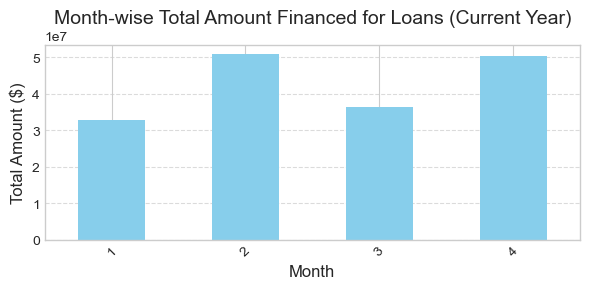

In [20]:
plt.figure(figsize=(6, 3))
monthly_amount_financed.plot(kind='bar', color='skyblue')
plt.title('Month-wise Total Amount Financed for Loans (Current Year)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. How much interest generated month wise.

##### I calculated it for the whole dataset monthly wise not only for the current year

In [21]:
df['interest_generated'] = df['loan_amount'] * df['profit_percentage'] / 100

monthly_interest_generated = df.groupby(['year', 'month'])['interest_generated'].sum()

In [30]:
monthly_interest_generated

year  month
2021  4        5035717.27
      5        3316719.23
      6        2935280.48
      7        4341485.66
      8        3109659.65
      9        4877065.25
      10       3292213.92
      11       4077234.52
      12       2854879.03
2022  1        4039825.56
      2        4128771.68
      3        3127995.73
      4        4110710.17
      5        5406158.71
      6        2957772.51
      7        3798802.83
      8        4057238.19
      9        3985658.37
      10       4867576.35
      11       4869700.93
      12       5000540.75
2023  1        3297826.12
      2        5332072.81
      3        3179685.59
      4        3844681.11
      5        2902342.07
      6        3616180.53
      7        5064990.59
      8        3294883.94
      9        5512426.09
      10       3055112.03
      11       4425303.10
      12       3764643.73
2024  1        3289665.82
      2        5095506.96
      3        3599791.28
      4        5125662.09
Name: interest_generated, 

In [22]:
monthly_interest_df = monthly_interest_generated.reset_index()
monthly_interest_df = monthly_interest_df.sort_values(by=['year', 'month'])
monthly_interest_df

,year,month,interest_generated
0,2021,4,5035717.27
1,2021,5,3316719.23
2,2021,6,2935280.48
3,2021,7,4341485.66
4,2021,8,3109659.65
5,2021,9,4877065.25
6,2021,10,3292213.92
7,2021,11,4077234.52
8,2021,12,2854879.03
9,2022,1,4039825.56


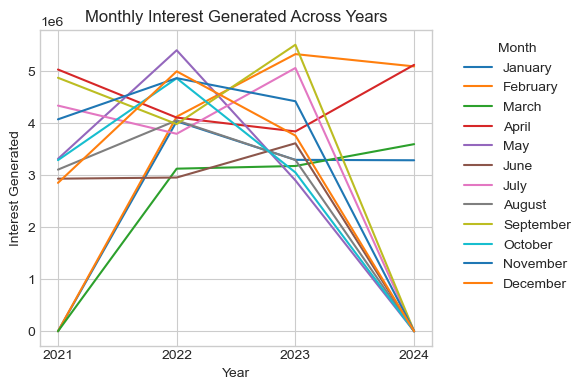

In [23]:
years = df['year'].unique()  # Get unique years in the DataFrame
months = range(1, 13)  # Months from 1 to 12

plt.figure(figsize=(6, 4))

for month in months:
    interest_by_month = [monthly_interest_generated.get((year, month), 0) for year in years]
    
    plt.plot(years, interest_by_month, label=pd.Timestamp(year=2022, month=month, day=1).strftime('%B'))

plt.xlabel('Year')
plt.ylabel('Interest Generated')
plt.title('Monthly Interest Generated Across Years')
plt.xticks(years)  # Set x-axis ticks to display all years
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()

### 5. Total outstanding amount with interest as of current date.

It is the amount that is left to be repaid on any loan.

To calculate the total outstanding amount with interest as of the current date for all active loans in dataset, we need to consider the remaining principal amount plus accumulated interest for each loan that is still active (not yet completed or fully repaid).

This involves determining the amount left to be repaid based on the loan details and the current date.

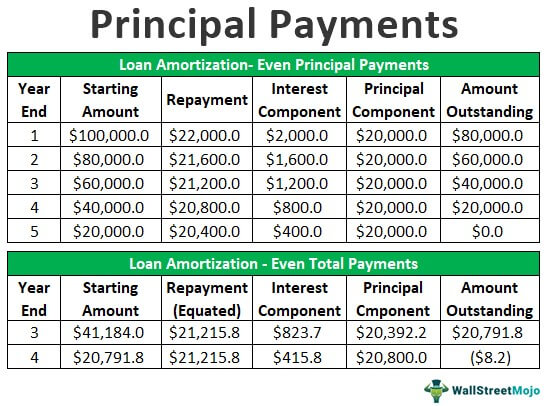

In [24]:
active_loans = df[df['status'] == 'Active']

def calculate_outstanding_amount(row):
    remaining_days = (row['maturity_date'] - datetime.now()).days
    
    remaining_principal_with_interest = (row['loan_amount'] *
                                         (1 + row['profit_percentage'] / 100) **
                                         (remaining_days / 365))
    return remaining_principal_with_interest

df['outstanding_amount_with_interest'] = active_loans.apply(calculate_outstanding_amount, axis=1)

total_outstanding_amount = df['outstanding_amount_with_interest'].sum()

print(f"Total Outstanding Amount with Interest (Current Date): ${total_outstanding_amount:.2f}")

Total Outstanding Amount with Interest (Current Date): $765603535.67
